In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/3'),Path('training/2'),Path('training/6'),Path('training/0'),Path('training/5'),Path('training/9'),Path('training/4'),Path('training/7'),Path('training/8'),Path('training/1')]

In [ ]:
imgl = (path/'training/8').ls().sorted()
img = imgl[1]
img
imgx=Image.open(img)
array(imgx)[:10,:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  58, 125, 245, 187, 254],
       [  0,   0,   0,   0,   0, 118, 253, 253, 253, 253],
       [  0,   0,   0,   0,   0, 242, 253, 253, 253, 253],
       [  0,   0,   0,   0,   0, 194, 253, 253, 253, 253],
       [  0,   0,   0,   0,   0,  73, 198, 253, 253, 253]], dtype=uint8)

In [ ]:
imgx_t = tensor(imgx)

In [ ]:
df = pd.DataFrame(imgx_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,58,125,245,187,254,255,214,125,225,157,35,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,118,253,253,253,253,253,253,253,253,253,249,136,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,242,253,253,253,253,253,253,253,253,253,253,251,137,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,194,253,253,253,253,108,19,56,48,140,253,253,250,235,235,225,46,0,0,0,0,0,0
9,0,0,0,0,0,73,198,253,253,253,245,188,71,76,201,253,253,253,253,253,195,68,0,0,0,0,0,0


In [ ]:
(path/'training').ls().sorted()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [ ]:
l = '0','1','2','3','4','5','6','7','8','9'
no = []
train = torch.empty((0,28,28))
for i in l:
  x = [tensor(Image.open(o)) for o in (path/'training'/i).ls().sorted()]
  stacked_x = torch.stack(x).float()/255
  no.append(len(stacked_x))
  train = torch.cat([train,stacked_x])
train_x = train.view(-1,28*28)

In [ ]:
train_x.shape


torch.Size([60000, 784])

In [ ]:
c = 0
for i in no:
  c = c + i
c

60000

In [ ]:
train_y = tensor([0]*no[0] + [1]*no[1] + [2]*no[2] + [3]*no[3] + [4]*no[4] + [5]*no[5] + [6]*no[6] + [7]*no[7] + [8]*no[8] + [9]*no[9]).unsqueeze(1)

In [ ]:
train_y

tensor([[0],
        [0],
        [0],
        ...,
        [9],
        [9],
        [9]])

In [ ]:
dset = tuple(zip(train_x,train_y))

In [ ]:
x,y = dset[15000]
x.shape,y

(torch.Size([784]), tensor([2]))

In [ ]:
valid_no = []
valid = torch.empty((0,28,28))
for i in l:
  x = [tensor(Image.open(o)) for o in (path/'testing'/i).ls().sorted()]
  stacked_x = torch.stack(x).float()/255
  valid_no.append(len(stacked_x))
  valid = torch.cat([valid,stacked_x])
valid_x = valid.view(-1, 28*28)

In [ ]:
valid_no

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [ ]:
valid_y = tensor([0]*valid_no[0] + [1]*valid_no[1] + [2]*valid_no[2] + [3]*valid_no[3] + [4]*valid_no[4] + [5]*valid_no[5] + [6]*valid_no[6] + [7]*valid_no[7] + [8]*valid_no[8] + [9]*valid_no[9]).unsqueeze(1)
valid_y.shape

torch.Size([10000, 1])

In [ ]:
valid_dset = tuple(zip(valid_x,valid_y))

In [ ]:
x,y = valid_dset[5000]
img = x
df = pd.DataFrame(img)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [ ]:
def init_params(size, std = 1.0):
  return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
train_x.shape

torch.Size([60000, 784])

In [ ]:
valid_x.shape


torch.Size([10000, 784])

In [ ]:
train_y.shape

torch.Size([60000, 1])

In [ ]:
x,y = first(valid_dl)
x.shape,y.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
# w1 = init_params((28*28,100))
# b1 = init_params(100)
# w2 = init_params((100,20))
# b2 = init_params(20)
# w3 = init_params((20,1))
# b3 = init_params(1)

In [ ]:
# def first_nn(xb):
#     out = xb@w1 + b1
#     out = out.max(tensor(0.0))
#     out = out@w2 + b2
#     out = out.max(tensor(0.0))
#     out = out@w3 + b3
#     return out

In [ ]:
def mnist_loss(preds, yb):
    preds = preds.sigmoid()
    return ((preds - yb)**2).mean().sqrt()

In [ ]:
def calc_grad(x,y,model):
    preds = model(x)
    loss = mse_loss(preds,y)
    loss.backward()

In [ ]:
# def train_model(model, lr):
#     for xb,yb in dl:
#         calc_grad(xb, yb, model)
#         ?

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = preds == yb
    return correct.float().mean()
def test_model(model):
    accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
first_nn = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(500,200),
    nn.ReLU(),
    nn.Linear(100,10),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn = Learner(dls, first_nn, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
parameters = w1,b1,w2,b2,w3,b3
for i in range(20):
    train_model(first_nn, 1, parameters)
    print(test_model(first_nn))

In [ ]:
 learn.fit(40, 0.01)

In [ ]:
path = path/'training'

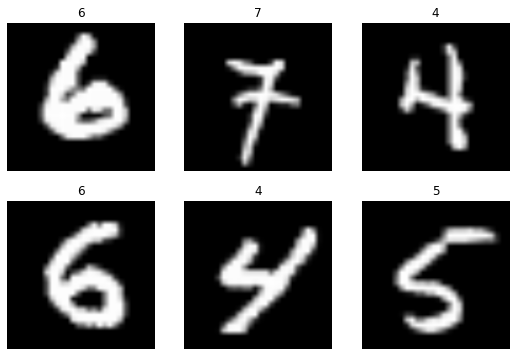

In [ ]:
mnist1 = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(192, method='squish')]
    )
dls = mnist1.dataloaders(path, bs=32)
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.182242,0.087824,0.028000,02:23


epoch,train_loss,valid_loss,error_rate,time
0,0.063436,0.034217,0.009833,02:37
1,0.018800,0.018849,0.005583,02:35
2,0.010620,0.015998,0.004250,02:36


In [ ]:
learn.export()

In [ ]:
path


Path('training')

In [ ]:
Path.BASE_PATH = path

In [ ]:
path


Path('.')

In [ ]:
path.ls()

(#10) [Path('3'),Path('2'),Path('6'),Path('0'),Path('5'),Path('9'),Path('4'),Path('7'),Path('8'),Path('1')]

In [ ]:
path.ls().sorted()

(#10) [Path('0'),Path('1'),Path('2'),Path('3'),Path('4'),Path('5'),Path('6'),Path('7'),Path('8'),Path('9')]

In [ ]:
(path/'4').ls()

(#6131) [Path('3/50728.png'),Path('3/52129.png'),Path('3/35870.png'),Path('3/56697.png'),Path('3/16743.png'),Path('3/5388.png'),Path('3/24789.png'),Path('3/59480.png'),Path('3/6594.png'),Path('3/10034.png')...]

In [ ]:
img = PILImage.create(path/'3/10880.png')
img

In [ ]:
learn.predict(img)

('3',
 TensorBase(3),
 TensorBase([9.1806e-08, 4.8119e-07, 2.3273e-06, 9.9999e-01, 1.1460e-08,
             1.0790e-06, 9.1200e-08, 1.5256e-08, 9.2811e-06, 2.0088e-07]))